In [ ]:
!pip install pycaret #Instalação da biblioteca de auto machine learning

In [1]:
from pycaret.datasets import get_data #Importação do dataset o qual contém observações dos funcionários de uma empresa
import pandas as pd #Importação da biblioteca de manipulaçao e analise de dados

In [2]:
df = get_data('employee') #Dados de classificaçao dos funcionários

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
df.shape #Check de sanidade, verifica se a base esta coerente

(14999, 10)

In [12]:
import missingno as msno #Biblioteca para visualização de dados nulos

In [13]:
df.isna().sum().any() #Verifica se existe valor nulo em cada celula, soma e gera um valor bool (se n> 0, True/ se n= 0, False) 

False

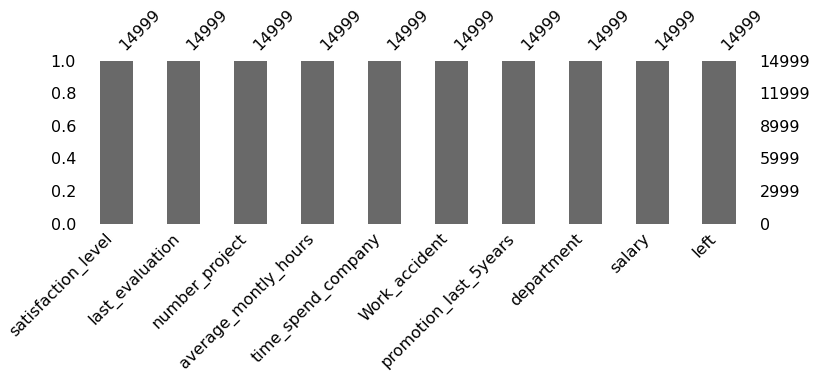

In [14]:
msno.bar(df, figsize=(12, 3)); #Gráfico em barra para visualizaçao dados tabela

In [15]:
df.nunique() #retorna valores unicos de uma serie de objetos

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64

In [16]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [43]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [18]:
df['left'].value_counts() #conta valores da coluna 'left' (True == 1 - Saida funcionario , False == 0 - Permanencia funcionario)

0    11428
1     3571
Name: left, dtype: int64

In [19]:
df['left'].value_counts(normalize=True) #Numeros em percentual

0    0.761917
1    0.238083
Name: left, dtype: float64

In [20]:
import seaborn as sns #Biblioteca de visualização de dados estatisticos

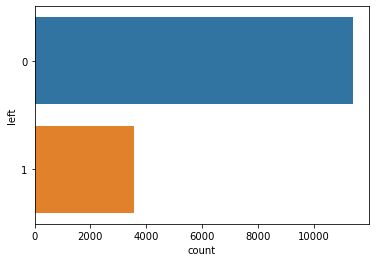

In [21]:
sns.countplot(data=df, y='left'); #Metodo visualizaçao de dados (categoricos x variavel numerica) 

In [22]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


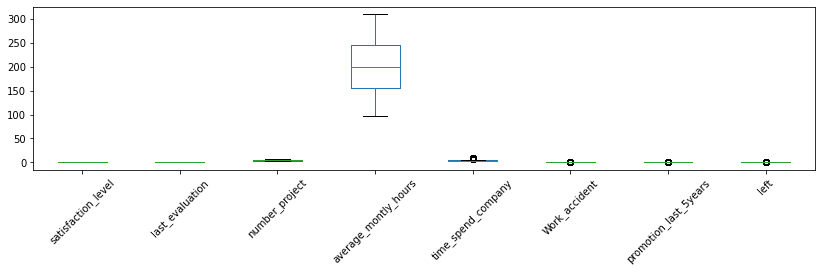

In [26]:
df.plot(kind='box', figsize=(14, 3),rot=45);#Metodo de visualizaçao de dados em quartis

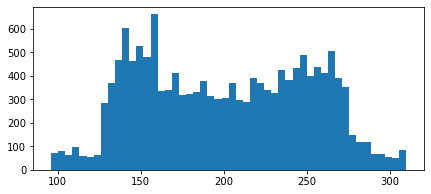

In [37]:
df['average_montly_hours'].hist(grid=False, bins=50,figsize=(7,3)); #Visualização em histograma da media de horas mensais

In [39]:
import matplotlib.pyplot as plt #Biblioteca de criação de graficos e visualizaçao de dados do panda

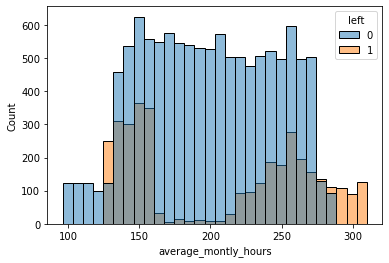

In [40]:
sns.histplot(data=df, x='average_montly_hours', hue='left'); #Visualizacao dados- media de horas mensais x coluna 'left'

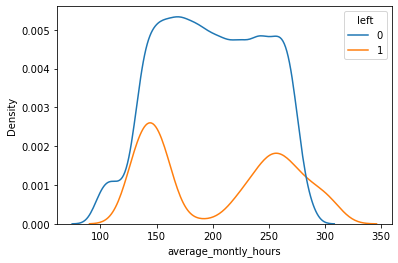

In [44]:
sns.kdeplot(data=df, x='average_montly_hours', hue='left');

In [45]:
df['department'].value_counts() #Contagem valores da coluna departamento

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

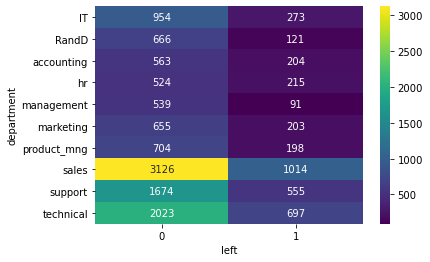

In [46]:
sns.heatmap(pd.crosstab(df['department'], df['left']), annot=True, fmt='.5g', cmap='viridis');

In [48]:
!pip install researchpy

In [49]:
import researchpy as rp

In [50]:
def categorical_analysis(data, index, col, figsize=(16, 5)):
    abs_tbl, test = rp.crosstab(data[index], data[col], test='chi-square', margins=False)
    row_tbl = rp.crosstab(data[index], data[col], prop='row')
    row_tbl = row_tbl.iloc[:-1, :-1]
    
    abs_tbl = abs_tbl.sort_values(('left', 1))
    row_tbl = row_tbl.sort_values(('left', 1))
    
    print(test)
    
    _, ax = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    sns.heatmap(abs_tbl, annot=True, fmt='.5g', cbar=False, cmap='Blues', annot_kws={'fontsize': 20}, ax=ax[0])
    sns.heatmap(row_tbl, annot=True, fmt='.5g', cbar=False, cmap='Greens', annot_kws={'fontsize': 20}, ax=ax[1])
    plt.show()

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   381.2250
1                    p-value =     0.0000
2                 Cramer's V =     0.1594


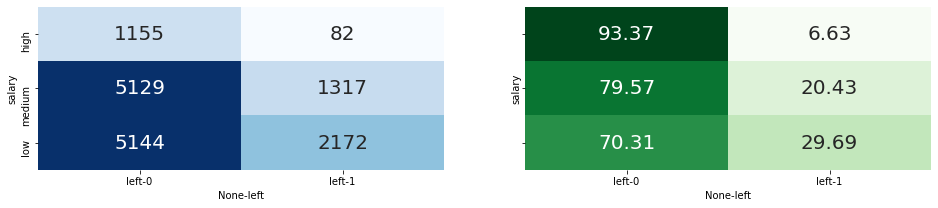

In [54]:
categorical_analysis(df, 'salary', 'left', figsize=(16, 3)) #Visualizaçao dados: salario x permanencia na empresa

                Chi-square test  results
0  Pearson Chi-square ( 9.0) =   86.8255
1                    p-value =    0.0000
2                 Cramer's V =    0.0761


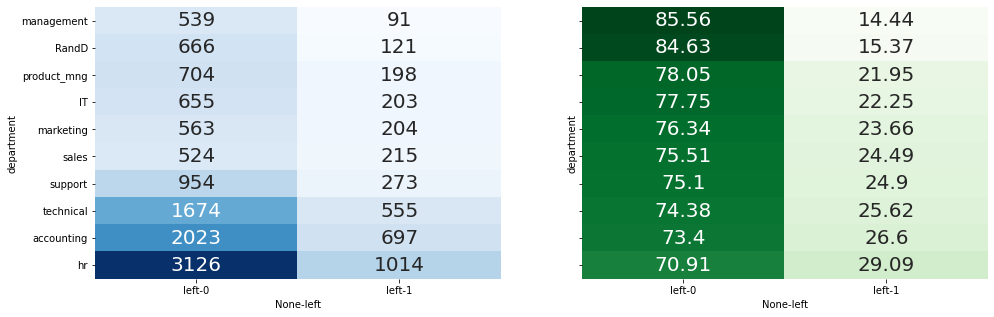

In [55]:
categorical_analysis(df, 'department', 'left')

In [56]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [57]:
df = pd.get_dummies(df, columns=['department'], drop_first=True) #separa e converte variaveis categoricas em numericas

In [58]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [60]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [61]:
df['salary'] = pd.Categorical(df['salary'], categories=['low', 'medium', 'high'], ordered=True) #definiçao categorias

In [62]:
df['salary'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3}) #conversao variaveis categoricas em numericas

In [63]:
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split # Biblioteca de Modelagem de machine learning

In [65]:
x = df.drop(columns='left') #todas as variaveis menos o 'left'
y = df['left'] #variavel resposta

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42) #features treino e de teste

In [67]:
from sklearn.linear_model import LogisticRegression #Biblioteca prever variavel numerica

In [68]:
lr = LogisticRegression(solver='liblinear')

In [69]:
lr.fit(x_train, y_train) #treino do modelo

LogisticRegression(solver='liblinear')

In [70]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [83]:
def classification_results(classifier, x_test, y_test, cmap='Blues'): #Funçao para classificar o modelo 
    print('Resultados do modelo:', classifier.__class__.__name__)
    
    y_pred = classifier.predict(x_test)  #Avaliaçao do modelo, previsao se funcionario vai sair ou nao
    
    print(classification_report(y_test, y_pred)) #Comparaçao entre o teste e a previsao
    
    plot_confusion_matrix(classifier, x_test, y_test, cmap=cmap); #tabela freq entre x teste e o y test

Resultados do modelo: LogisticRegression
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2853
           1       0.60      0.35      0.44       897

    accuracy                           0.79      3750
   macro avg       0.71      0.64      0.66      3750
weighted avg       0.77      0.79      0.77      3750



0    2853
1     897
Name: left, dtype: int64

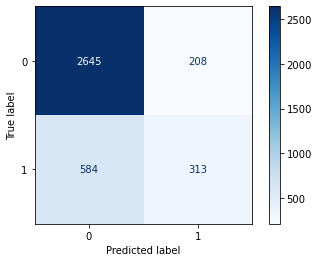

In [91]:
classification_results(lr, x_test, y_test)
y_test.value_counts()

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Resultados do modelo: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2853
           1       0.92      0.96      0.94       897

    accuracy                           0.97      3750
   macro avg       0.95      0.97      0.96      3750
weighted avg       0.97      0.97      0.97      3750



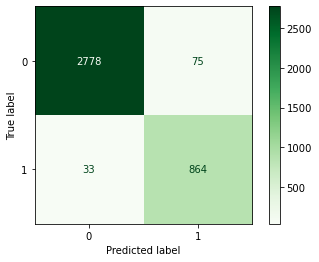

In [75]:
classification_results(dt, x_test, y_test, cmap='Greens')

In [76]:
from sklearn.ensemble import RandomForestClassifier

Resultados do modelo: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2853
           1       0.99      0.96      0.98       897

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750



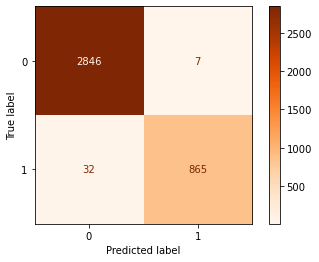

In [77]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
classification_results(rf, x_test, y_test, cmap='Oranges')

In [78]:
feat = pd.Series(rf.feature_importances_, index=x_train.columns)

In [80]:
feat.sort_values(inplace=True)

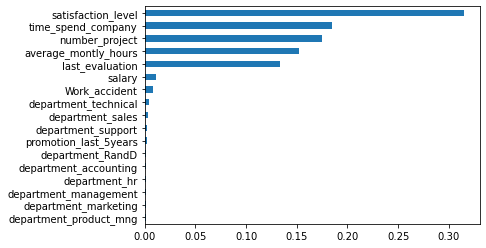

In [81]:
feat.plot(kind='barh');